In [9]:
import os
import shutil
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms


In [10]:
path_to_test = '/home/i.karakulin/Classification-of-the-Simpsons/simpsons dataset/data/testset'

In [11]:
classes_in_train = set(['selma_bouvier', 'mayor_quimby', 'milhouse_van_houten', 'martin_prince', 'sideshow_bob', 'apu_nahasapeemapetilon', 'marge_simpson', 'ralph_wiggum', 'ned_flanders', 'gil', 'homer_simpson', 'fat_tony', 'chief_wiggum', 'groundskeeper_willie', 'barney_gumble', 'lenny_leonard', 'principal_skinner', 'agnes_skinner', 'krusty_the_clown', 'snake_jailbird', 'waylon_smithers', 'rainier_wolfcastle', 'lionel_hutz', 'kent_brockman', 'cletus_spuckler', 'disco_stu', 'comic_book_guy', 'abraham_grampa_simpson', 'maggie_simpson', 'sideshow_mel', 'nelson_muntz', 'miss_hoover', 'bart_simpson', 'edna_krabappel', 'moe_szyslak', 'charles_montgomery_burns', 'patty_bouvier', 'otto_mann', 'lisa_simpson', 'troy_mcclure', 'professor_john_frink', 'carl_carlson'])

In [12]:
files = os.listdir(path_to_test)
# classes = set("_".join(f.split("_")[:-1]) for f in files)
classes = set(f for f in files)
classes

{'abraham_grampa_simpson',
 'agnes_skinner',
 'apu_nahasapeemapetilon',
 'barney_gumble',
 'bart_simpson',
 'carl_carlson',
 'charles_montgomery_burns',
 'chief_wiggum',
 'cletus_spuckler',
 'comic_book_guy',
 'disco_stu',
 'edna_krabappel',
 'fat_tony',
 'gil',
 'groundskeeper_willie',
 'homer_simpson',
 'kent_brockman',
 'krusty_the_clown',
 'lenny_leonard',
 'lionel_hutz',
 'lisa_simpson',
 'maggie_simpson',
 'marge_simpson',
 'martin_prince',
 'mayor_quimby',
 'milhouse_van_houten',
 'miss_hoover',
 'moe_szyslak',
 'ned_flanders',
 'nelson_muntz',
 'otto_mann',
 'patty_bouvier',
 'principal_skinner',
 'professor_john_frink',
 'rainier_wolfcastle',
 'ralph_wiggum',
 'selma_bouvier',
 'sideshow_bob',
 'sideshow_mel',
 'snake_jailbird',
 'troy_mcclure',
 'waylon_smithers'}

In [13]:
classes_in_train - classes

set()

In [14]:
simpsons_count = dict()

In [7]:
def check_count_simpsons(path):
    for simpson in os.listdir(path):
        simpsons_count[simpson] = len(os.listdir(os.path.join(path, simpson)))

    plt.figure(figsize=(17, 10))
    plt.barh(simpsons_count.keys(), simpsons_count.values(), color='skyblue')
    plt.xlabel('Counts')
    plt.ylabel('Simpsons')
    plt.tight_layout()
    plt.show()

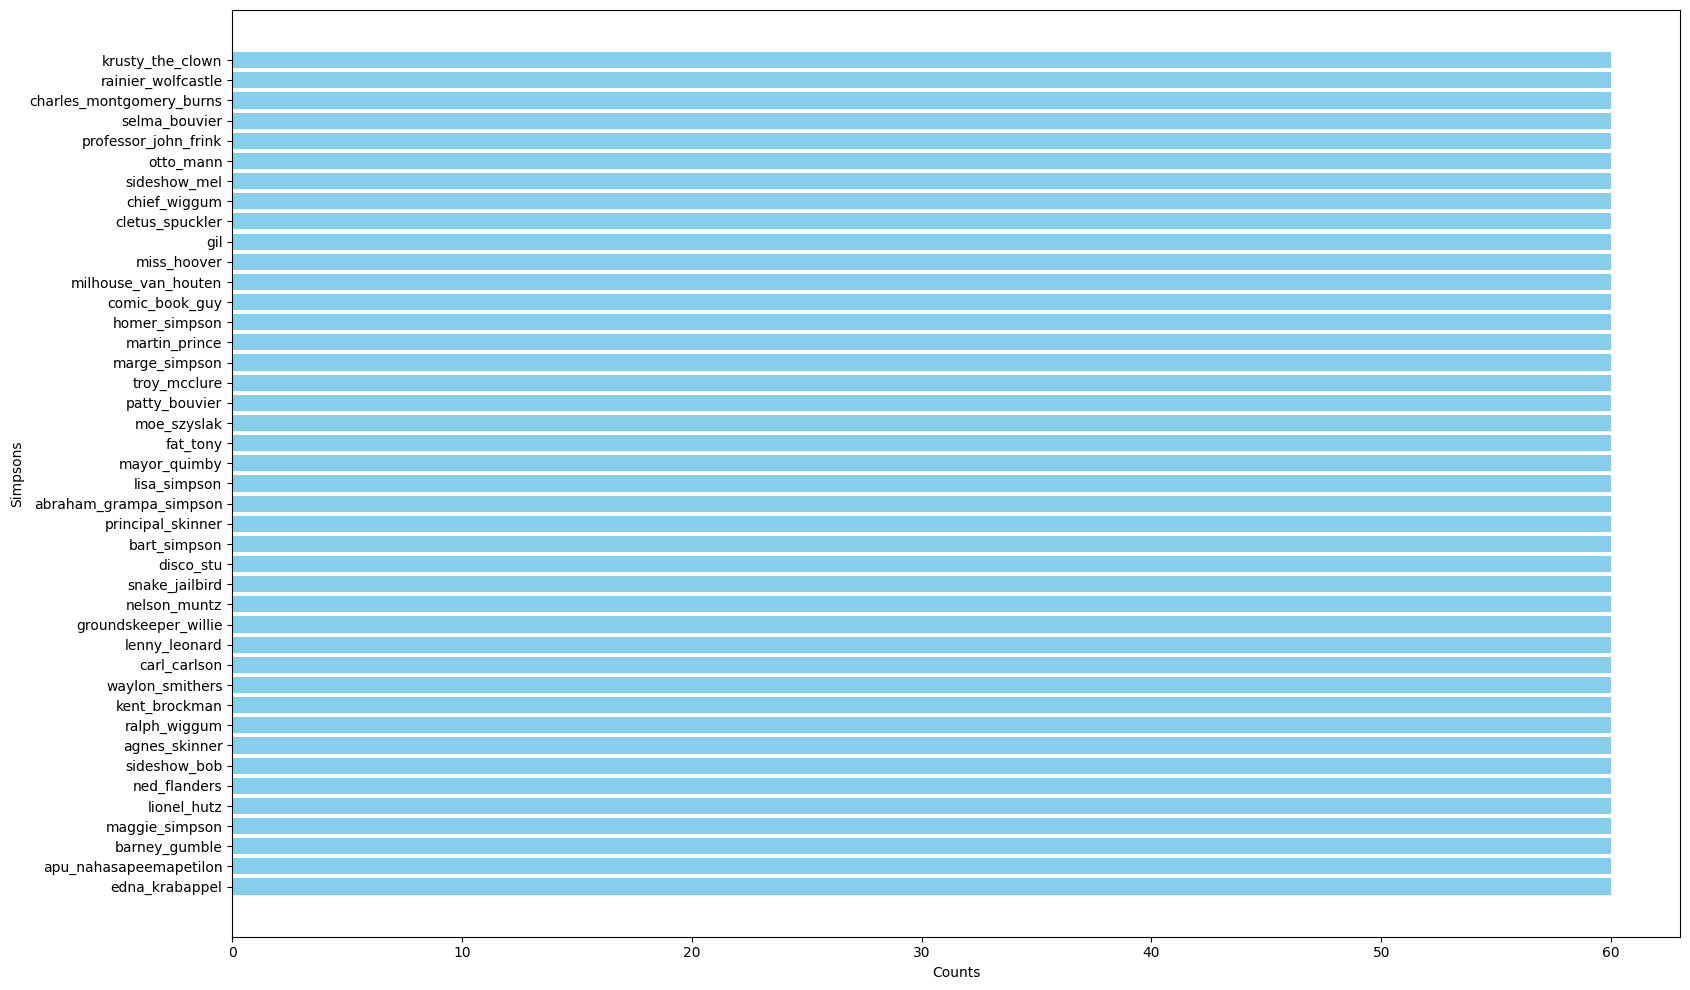

In [15]:
check_count_simpsons(path_to_test)

In [25]:
max_count = 60

In [31]:
def load_image(path):
    image = Image.open(path)
    image.load()
    
    if image.mode in ('RGBA', 'LA', 'P'):
        image = image.convert('RGB')
    
    return image, image.size

In [32]:
for simpson in os.listdir(path_to_test):

    path_to_simpson_dir = os.path.join(path_to_test, simpson)
    img_list = os.listdir(path_to_simpson_dir)
    count_img_for_cur_simps = simpsons_count[simpson]

    path_list_to_simpson_imgs = []

    for img in img_list:
        path_list_to_simpson_imgs.append(os.path.join(path_to_simpson_dir, img))

    print(simpson, count_img_for_cur_simps, len(list(range(max_count - count_img_for_cur_simps))))
    
    for i in range(max_count - count_img_for_cur_simps):
        path_to_img = path_list_to_simpson_imgs[i % count_img_for_cur_simps]
        
        img, size = load_image(path_to_img)

        transforms_test = transforms.Compose([
            transforms.RandomRotation(degrees=(-15, 15), expand=True),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomResizedCrop(size=size, scale=(0.6, 1)),
        ])

        transform_img = transforms_test(img)
        transform_img.save(str(path_to_img)[:-4] + str(i + count_img_for_cur_simps) + ".jpg", "JPEG")

selma_bouvier 13 47
mayor_quimby 50 10
milhouse_van_houten 49 11
martin_prince 9 51
sideshow_bob 47 13
apu_nahasapeemapetilon 50 10
marge_simpson 50 10
ralph_wiggum 18 42
ned_flanders 49 11
gil 18 42
homer_simpson 50 10
fat_tony 37 23
chief_wiggum 50 10
groundskeeper_willie 28 32
barney_gumble 33 27
lenny_leonard 50 10
principal_skinner 50 10
agnes_skinner 20 40
krusty_the_clown 50 10
snake_jailbird 10 50
waylon_smithers 22 38
rainier_wolfcastle 11 49
lionel_hutz 24 36
kent_brockman 50 10
cletus_spuckler 20 40
disco_stu 26 34
comic_book_guy 49 11
abraham_grampa_simpson 48 12
maggie_simpson 23 37
sideshow_mel 15 45
nelson_muntz 50 10
miss_hoover 25 35
bart_simpson 50 10
edna_krabappel 50 10
moe_szyslak 50 10
charles_montgomery_burns 48 12
patty_bouvier 20 40
otto_mann 14 46
lisa_simpson 50 10
troy_mcclure 24 36
professor_john_frink 23 37
carl_carlson 52 8


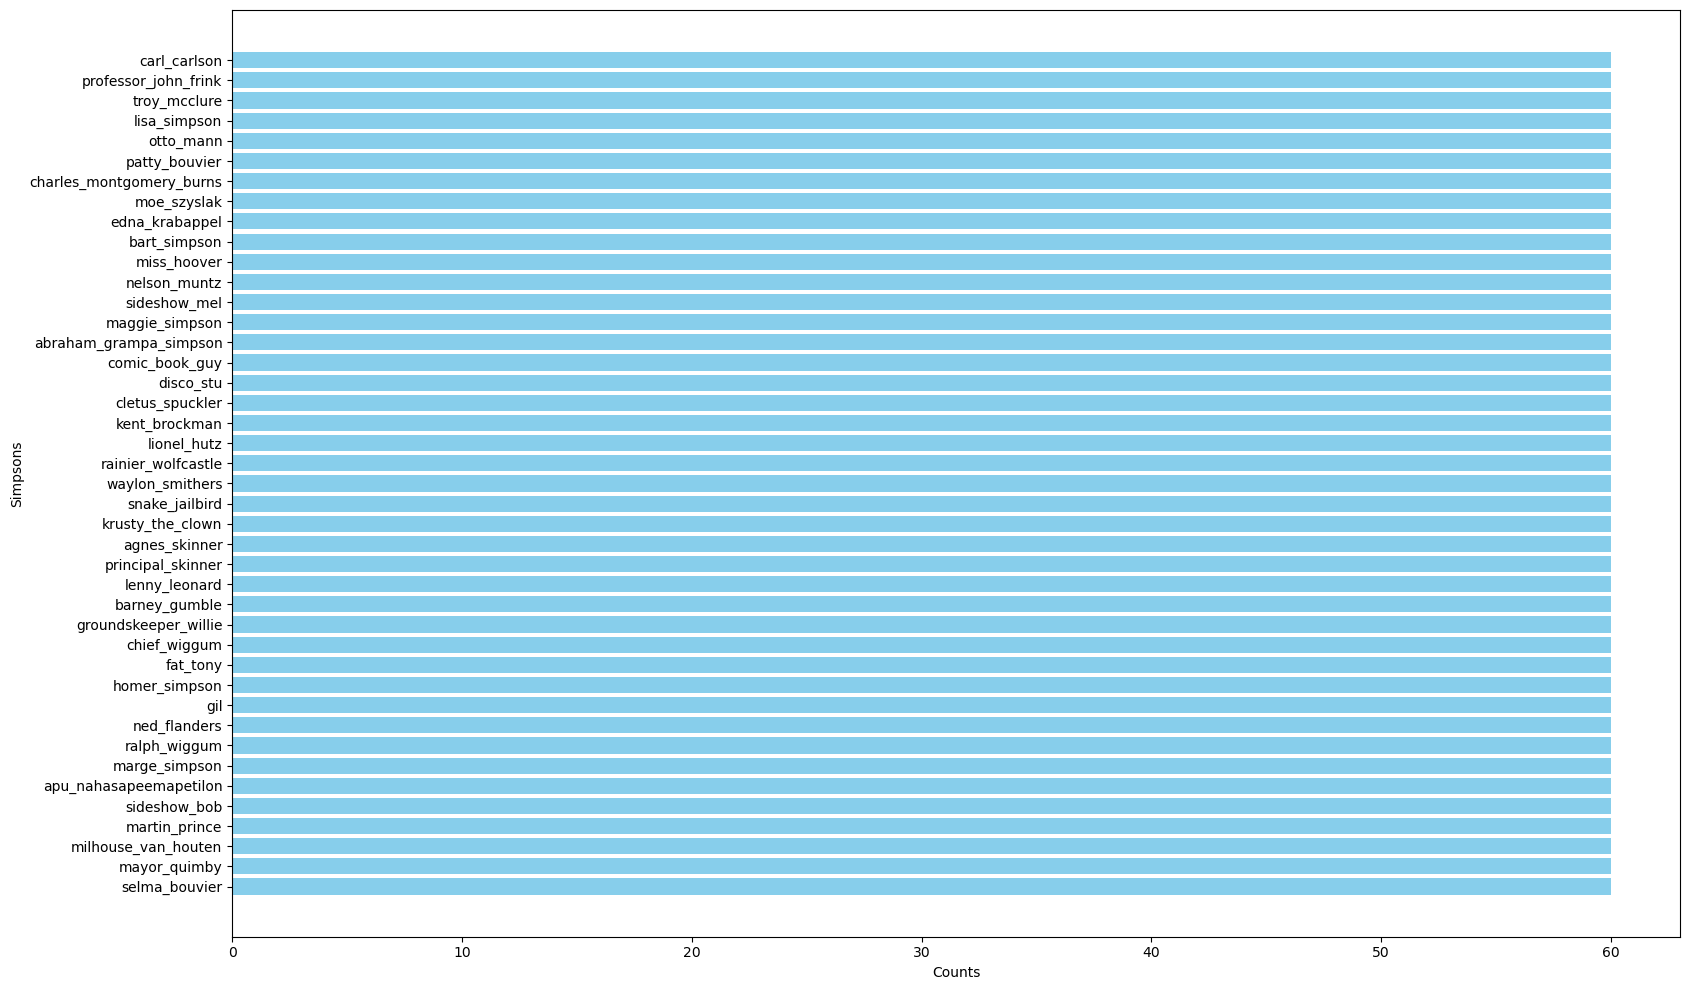

In [33]:
check_count_simpsons(path_to_test)